In [1]:
import os
import re
import json
import gzip
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [2]:
business_file = '/home/yuqihang/workroot/models/data/recsys/yelp/yelp_academic_dataset_business.json'
review_file = '/home/yuqihang/workroot/models/data/recsys/yelp/yelp_academic_dataset_review.json'
review = pd.read_json(review_file, lines=True)
business = pd.read_json(business_file, lines=True)


In [14]:
business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."


In [15]:
review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


In [17]:
df_meta = business
df = review

In [20]:
print(len(df_meta))

150346


In [21]:
df_meta.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [33]:
import pycountry

In [22]:
df3 = df_meta.fillna('')
df4 = df3[df3.name.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.name.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

0
150346


In [23]:
df['stars'].dropna().describe()

count    6.990280e+06
mean     3.748584e+00
std      1.478705e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [24]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [25]:
rating = df[['business_id','user_id','stars','date']]
rating.head(2) 

,business_id,user_id,stars,date
0,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3,2018-07-07 22:09:11
1,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5,2012-01-03 15:28:18


In [27]:
rating['timestamp'] = rating['date'].apply(lambda x: pd.Timestamp(x).timestamp())

/tmp/ipykernel_1367491/4252277853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating['timestamp'] = rating['date'].apply(lambda x: pd.Timestamp(x).timestamp())


In [28]:
rating.head()

,business_id,user_id,stars,date,timestamp
0,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3,2018-07-07 22:09:11,1.531001e+09
1,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5,2012-01-03 15:28:18,1.325604e+09
2,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3,2014-02-05 20:30:30,1.391632e+09
3,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5,2015-01-04 00:01:03,1.420330e+09
4,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4,2017-01-14 20:54:15,1.484427e+09


In [30]:
rating['stars'].describe()

count    6.990280e+06
mean     3.748584e+00
std      1.478705e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [31]:
rating.columns = ['iid','uid','rating','date','timestamp']

In [ ]:
del rating['date']

In [32]:
df5.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [35]:
def alpha2name(x):
    try:
        country = pycountry.countries.get(alpha_2=x)
        return country.name
    except:
        return ''
        
def attr2desc(x):
    desc = []
    if isinstance(x, dict):
        for choices, eva in x.items():
            if eva == 'True':
                choices = re.split('(?=[A-Z])', choices)
                choices = ' '.join([choice.lower() for choice in choices if choice])
                desc.append(choices)
    return ', '.join(desc)

In [38]:
df5['state'] = df5['state'].map(alpha2name)
df5['address'] = df5['city']+', '+df5['state']

In [50]:
df5['desc'] = df5['attributes'].apply(lambda x: attr2desc(x))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,desc
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","Santa Barbara, Canada",Santa Barbara,Canada,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",,by appointment only
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,"Affton, Macao",Affton,Macao,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",business accepts credit cards
2,tUFrWirKiKi_TAnsVWINQQ,Target,"Tucson, Azerbaijan",Tucson,Azerbaijan,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...","bike parking, business accepts credit cards, w..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Philadelphia, Panama",Philadelphia,Panama,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","bike parking, restaurants take out, caters"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,"Green Lane, Panama",Green Lane,Panama,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...","business accepts credit cards, wheelchair acce..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,"Ashland City, Tunisia",Ashland City,Tunisia,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...","business accepts credit cards, outdoor seating..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"Brentwood, Macao",Brentwood,Macao,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...","business accepts credit cards, bike parking"
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,"St. Petersburg,",St. Petersburg,,33707,27.766590,-82.732983,3.5,5,1,,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,"Affton, Macao",Affton,Macao,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",,"caters, restaurants take out, has t v, busines..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,"Nashville, Tunisia",Nashville,Tunisia,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...","business accepts credit cards, outdoor seating..."


In [52]:
meta_data = df5[['business_id','categories','name','desc','address']]
meta_data.head(2)

,business_id,categories,name,desc,address
0,Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"
1,mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",The UPS Store,business accepts credit cards,"Affton, Macao"


In [53]:
meta_data.shape

(150346, 5)

In [55]:
meta_data['name'] = meta_data['name'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
meta_data['name'] = meta_data['name'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

/tmp/ipykernel_1367491/3253740050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['name'] = meta_data['name'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
/tmp/ipykernel_1367491/3253740050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['name'] = meta_data['name'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))


In [57]:
meta_data = meta_data.drop_duplicates(subset=['business_id'],keep='last')
meta_data.shape

(150346, 5)

In [58]:
len(set(meta_data['name']))

114037

In [63]:
meta_data.columns = ['iid', 'category', 'title', 'desc', 'address']

In [64]:
meta_data.head(2)

,iid,category,title,desc,address
0,Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"
1,mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",The UPS Store,business accepts credit cards,"Affton, Macao"


In [60]:
rating.head(2)

,iid,uid,rating,date,timestamp
0,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3,2018-07-07 22:09:11,1.531001e+09
1,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5,2012-01-03 15:28:18,1.325604e+09


In [65]:
data = rating.merge(meta_data,on='iid',how='right')

In [66]:
data.head(2)

,iid,uid,rating,date,timestamp,category,title,desc,address
0,Pns2l4eNsfO8kk83dixA6A,e0imecnX_9MtLnS2rUZM-A,5,2012-05-02 18:07:38,1.335982e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"
1,Pns2l4eNsfO8kk83dixA6A,_Q0fdLVoTnlNkEypUvNkHA,5,2013-03-01 06:11:05,1.362118e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"


In [67]:
data.shape

(6990280, 9)

In [68]:
data.dropna(subset=['uid'], inplace=True)
data.dropna(subset=['iid'], inplace=True)
data.dropna(subset=['title'], inplace=True)
data.dropna(subset=['timestamp'], inplace=True)

In [69]:
data.shape

(6990280, 9)

In [70]:
#查看title列数据类型
type(data['category'][0]),type(data['desc'][0]),type(data['title'][0]),type(data['address'][0]),type(data['rating'][0])

(str, str, str, str, numpy.int64)

In [71]:
rating_ = data.copy()
rating_.head(2)

,iid,uid,rating,date,timestamp,category,title,desc,address
0,Pns2l4eNsfO8kk83dixA6A,e0imecnX_9MtLnS2rUZM-A,5,2012-05-02 18:07:38,1.335982e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"
1,Pns2l4eNsfO8kk83dixA6A,_Q0fdLVoTnlNkEypUvNkHA,5,2013-03-01 06:11:05,1.362118e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"


In [72]:
rating_.columns = ['iid','uid','rating','date', 'timestamp', 'category','title','description','address']
rating_.head(2)

,iid,uid,rating,date,timestamp,category,title,description,address
0,Pns2l4eNsfO8kk83dixA6A,e0imecnX_9MtLnS2rUZM-A,5,2012-05-02 18:07:38,1.335982e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"
1,Pns2l4eNsfO8kk83dixA6A,_Q0fdLVoTnlNkEypUvNkHA,5,2013-03-01 06:11:05,1.362118e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada"


In [73]:
date_min = pd.to_datetime(rating_.timestamp,unit='s').min()
date_max = pd.to_datetime(rating_.timestamp,unit='s').max()
date_min,date_max

(Timestamp('2005-02-16 03:23:22'), Timestamp('2022-01-19 19:48:45'))

In [74]:
rating_.shape

(6990280, 9)

In [75]:
rating_['time'] = pd.to_datetime(rating_.timestamp, unit='s').map(lambda x: x.year )

In [78]:
rating_.head(2)

,iid,uid,rating,timestamp,category,title,description,address,time
0,Pns2l4eNsfO8kk83dixA6A,e0imecnX_9MtLnS2rUZM-A,5,1.335982e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada",2012
1,Pns2l4eNsfO8kk83dixA6A,_Q0fdLVoTnlNkEypUvNkHA,5,1.362118e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada",2013


In [79]:
import numpy as np
np.sort(rating_.time.unique())

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [80]:
rating_.uid.unique().shape, rating_.iid.unique().shape

((1987929,), (150346,))

In [81]:
rating_.head()

,iid,uid,rating,timestamp,category,title,description,address,time
0,Pns2l4eNsfO8kk83dixA6A,e0imecnX_9MtLnS2rUZM-A,5,1.335982e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada",2012
1,Pns2l4eNsfO8kk83dixA6A,_Q0fdLVoTnlNkEypUvNkHA,5,1.362118e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada",2013
2,Pns2l4eNsfO8kk83dixA6A,ycUooVIDWPgXPf6niW-FWQ,4,1.358381e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada",2013
3,Pns2l4eNsfO8kk83dixA6A,CiwVvb7jWijWB5jkmatzKA,5,1.426477e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada",2015
4,Pns2l4eNsfO8kk83dixA6A,QkCbMKBktkrkOFJugHvY6w,5,1.362509e+09,"Doctors, Traditional Chinese Medicine, Naturop...","Abby Rappoport, LAC, CMQ",by appointment only,"Santa Barbara, Canada",2013


In [96]:
rating__ = rating_.copy()

In [97]:
s_rating = rating__[rating__.time.isin(range(2010,2023))].copy()
s_rating['time'] = pd.to_datetime(s_rating.timestamp, unit='s').map(lambda x: (x.year-2010)*12+x.month)
# s_rating = s_rating[s_rating.time.isin(range(1,13))]

In [98]:
s_rating.shape

(6847597, 9)

In [32]:
s_rating.shape

(7281147, 9)

In [99]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,1.973386e+06
mean,3.469973e+00
std,1.235463e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,2.273000e+03


In [33]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,3.330909e+06
mean,2.185934e+00
std,6.108465e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.294000e+03


In [100]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})

In [101]:
active_item = item_info[item_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((60501,), (40616,))

In [41]:
active_item = item_info[item_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((68023,), (24291,))

In [102]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(1927026, 9)

In [36]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(845689, 9)

In [103]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    47.444997
 dtype: float64,
 rating    32.110143
 dtype: float64)

In [37]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    34.018061
 dtype: float64,
 rating    16.628436
 dtype: float64)

In [104]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((1927026, 9), (40616,), (60013,))

In [38]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((845689, 9), (24860,), (50858,))

In [105]:
s_rating = s_rating.reset_index()
s_rating.head(2)

,index,iid,uid,rating,timestamp,category,title,description,address,time
0,22,tUFrWirKiKi_TAnsVWINQQ,P-NTOAMFVSDFGkhcj4GaIQ,4,1.487517e+09,"Department Stores, Shopping, Fashion, Home & G...",Target,"bike parking, business accepts credit cards, w...","Tucson, Azerbaijan",74
1,23,tUFrWirKiKi_TAnsVWINQQ,Dj-HuKJhpWTMlxbffWqfRQ,4,1.355759e+09,"Department Stores, Shopping, Fashion, Home & G...",Target,"bike parking, business accepts credit cards, w...","Tucson, Azerbaijan",24


<Axes: xlabel='time'>

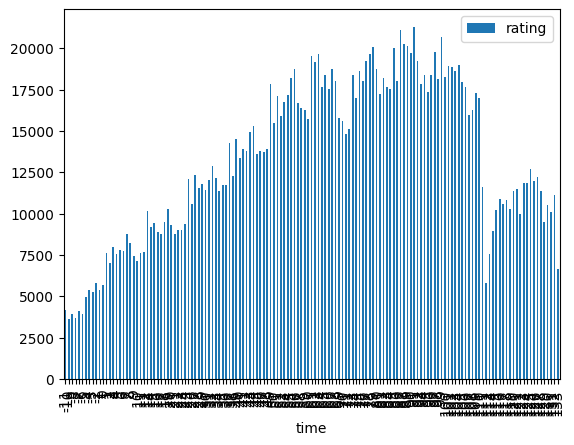

In [106]:
s_rating.groupby('time').agg({'rating':'count'}).reset_index().plot(x='time',kind='bar')

In [107]:
s_rating.rating.unique()

array([4, 5, 3, 2, 1])

In [109]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=4 else 0)
s_rating['label'].describe()

count    1.927026e+06
mean     7.001945e-01
std      4.581728e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: label, dtype: float64

In [42]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    845689.00000
mean          0.63175
std           0.48233
min           0.00000
25%           0.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: label, dtype: float64

In [110]:
users = s_rating.uid.unique()
items = s_rating.iid.unique()
users_map = dict(zip(users, np.arange(users.shape[0])+1))
items_map = dict(zip(items, np.arange(items.shape[0])+1))
s_rating['uid'] = s_rating['uid'].map(users_map)
s_rating['iid'] = s_rating['iid'].map(items_map)
s_rating.uid.max(), s_rating.iid.max()

(40616, 60013)

In [115]:
s_rating.tail(2)

,index,iid,uid,rating,timestamp,category,title,description,address,time,label
1927024,6990263,60013,10952,4,1.290568e+09,"Fitness/Exercise Equipment, Eyewear & Optician...",Cyclery Fitness Center,"bike parking, business accepts credit cards","Edwardsville, Israel",-1,1
1927025,6990269,60013,5949,5,1.526689e+09,"Fitness/Exercise Equipment, Eyewear & Optician...",Cyclery Fitness Center,"bike parking, business accepts credit cards","Edwardsville, Israel",89,1


In [116]:
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['category'] = s_rating['category'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['category'] = s_rating['category'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['address'] = s_rating['address'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['address'] = s_rating['address'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

In [117]:
s_rating.head()

,index,iid,uid,rating,timestamp,category,title,description,address,time,label
0,22,1,1,4,1.487517e+09,"Department Stores, Shopping, Fashion, Home and...",Target,"bike parking, business accepts credit cards, w...","Tucson, Azerbaijan",74,1
1,23,1,2,4,1.355759e+09,"Department Stores, Shopping, Fashion, Home and...",Target,"bike parking, business accepts credit cards, w...","Tucson, Azerbaijan",24,1
2,24,1,3,4,1.355333e+09,"Department Stores, Shopping, Fashion, Home and...",Target,"bike parking, business accepts credit cards, w...","Tucson, Azerbaijan",24,1
3,25,1,4,5,1.420598e+09,"Department Stores, Shopping, Fashion, Home and...",Target,"bike parking, business accepts credit cards, w...","Tucson, Azerbaijan",49,1
4,26,1,5,3,1.416111e+09,"Department Stores, Shopping, Fashion, Home and...",Target,"bike parking, business accepts credit cards, w...","Tucson, Azerbaijan",47,0


In [118]:
s_rating.tail()

,index,iid,uid,rating,timestamp,category,title,description,address,time,label
1927021,6990251,60013,37168,5,1.326063e+09,"Fitness/Exercise Equipment, Eyewear and Optici...",Cyclery Fitness Center,"bike parking, business accepts credit cards","Edwardsville, Israel",13,1
1927022,6990255,60013,1573,5,1.305335e+09,"Fitness/Exercise Equipment, Eyewear and Optici...",Cyclery Fitness Center,"bike parking, business accepts credit cards","Edwardsville, Israel",5,1
1927023,6990258,60013,9892,4,1.309969e+09,"Fitness/Exercise Equipment, Eyewear and Optici...",Cyclery Fitness Center,"bike parking, business accepts credit cards","Edwardsville, Israel",7,1
1927024,6990263,60013,10952,4,1.290568e+09,"Fitness/Exercise Equipment, Eyewear and Optici...",Cyclery Fitness Center,"bike parking, business accepts credit cards","Edwardsville, Israel",-1,1
1927025,6990269,60013,5949,5,1.526689e+09,"Fitness/Exercise Equipment, Eyewear and Optici...",Cyclery Fitness Center,"bike parking, business accepts credit cards","Edwardsville, Israel",89,1


In [119]:
s_rating.iid.unique().shape

(60013,)

In [120]:
id2title = {}
for i in range(len(s_rating)):
    iid = int(s_rating.iloc[i]['iid'])
    title = str(s_rating.iloc[i]['title'])
    description = str(s_rating.iloc[i]['description'])
    category = str(s_rating.iloc[i]['category'])
    address = str(s_rating.iloc[i]['address'])
    if iid not in id2title:
        id2title[iid] = {
            'title':title,
            'description':description,
            'category':category,
            'address':address
            }
print(len(id2title.keys()))


60013


In [121]:
#保存为字典 id2title 为 json 文件
import json
json_dir = '/home/yuqihang/workroot/models/data/collm/yelp'
json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)

In [122]:
del id2title

In [125]:
s_rating['time'] = s_rating['time'].apply(lambda x: x+12)

In [126]:
np.sort(s_rating.time.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145])

In [127]:
rating_train = s_rating[s_rating.time.isin(range(120))].copy()
rating_valid_test = s_rating[s_rating.time.isin(range(120,146))].copy()
rating_valid_test.sort_values(by="timestamp",inplace=True)
N_ = rating_valid_test.shape[0]//2
rating_valid = rating_valid_test.iloc[:N_].copy()
rating_test = rating_valid_test.iloc[N_:].copy()
rating_train.shape, rating_valid.shape, rating_test.shape

((1637168, 11), (144929, 11), (144929, 11))

In [128]:
rating_valid_test.timestamp.values[0:5].argsort()

array([0, 1, 2, 3, 4])

In [129]:
rating_train.time.unique(),rating_valid.time.unique(),rating_test.time.unique()

(array([ 86,  36,  61,  59,  92,  25,  29,  96,  33,  85, 108,  46, 101,
         99,  32,  88,  50,  24,  40,  60,  10,  38,  23,  39,  47,  41,
         52,   8,  75,  45, 113,  44,  58,  66, 106,  77,  73,  55,  63,
         42,  93, 107, 115,  98,  54,  79,  70,  82,  68,  22,  89,  30,
         94,  95,  56,  74, 104,  65,  76,  69,  78,  81,  90,  31, 109,
         97,  43, 103, 102, 110, 112, 118, 117, 116, 100,  49,  84,  51,
         53,  83,  71,  80,  91,  64,  62,  72, 111,  87,  34,  48,  37,
        105,  26,  21,  15,  13,   7,  12,   6,  28,  16,  17, 119, 114,
         27,  18,  67,  35,  57,  20,  19,   2,   9,   4,  14,   1,   5,
         11,   3]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]),
 array([132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145]))

In [130]:
s_rating[s_rating.time.isin(range(120))].groupby('iid').agg({"rating":'count'}).mean()

rating    28.436385
dtype: float64

In [131]:
train_user = rating_train['uid'].unique()
train_item = rating_train['iid'].unique()
rating_valid['not_cold'] = rating_valid[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
rating_test['not_cold'] = rating_test[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [132]:
rating_valid['not_cold'].describe(), rating_test['not_cold'].describe()

(count    144929.000000
 mean          0.849547
 std           0.357516
 min           0.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max           1.000000
 Name: not_cold, dtype: float64,
 count    144929.000000
 mean          0.715585
 std           0.451137
 min           0.000000
 25%           0.000000
 50%           1.000000
 75%           1.000000
 max           1.000000
 Name: not_cold, dtype: float64)

In [133]:
rating_train.shape, rating_valid.shape, rating_test.shape

((1637168, 11), (144929, 12), (144929, 12))

In [134]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  39752.000000  39752.000000
 mean      41.184544     28.474492
 std       51.251684     36.315417
 min        1.000000      0.000000
 25%       20.000000     12.000000
 50%       26.000000     19.000000
 75%       44.000000     31.000000
 max     1541.000000   1003.000000,
               label             
               count          sum
 count  57573.000000  57573.00000
 mean      28.436385     19.66057
 std       47.347651     36.25053
 min        1.000000      0.00000
 25%        7.000000      4.00000
 50%       14.000000      9.00000
 75%       30.000000     20.00000
 max     1577.000000   1459.00000)

In [91]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  15629.000000  15629.000000
 mean      17.096999     12.613539
 std       13.752546     10.369251
 min        1.000000      0.000000
 25%       11.000000      7.000000
 50%       15.000000     11.000000
 75%       20.000000     16.000000
 max      426.000000    354.000000,
               label              
               count           sum
 count  48128.000000  48128.000000
 mean       5.552049      4.096098
 std        8.785605      6.825704
 min        1.000000      0.000000
 25%        2.000000      1.000000
 50%        3.000000      2.000000
 75%        6.000000      5.000000
 max      596.000000    498.000000)

In [135]:
# rating_valid.groupby("uid").agg({'label':['count','sum']}).describe()
rating_test.groupby("uid").agg({'label':['count','sum']}).describe(), rating_test.groupby("iid").agg({'label':['count','sum']}).describe()
# rating_valid_test.groupby("uid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  18830.000000  18830.000000
 mean       7.696707      5.775146
 std       11.162426      9.426995
 min        1.000000      0.000000
 25%        2.000000      1.000000
 50%        4.000000      2.000000
 75%        9.000000      7.000000
 max      211.000000    186.000000,
               label              
               count           sum
 count  32358.000000  32358.000000
 mean       4.478923      3.360715
 std        6.135245      5.196708
 min        1.000000      0.000000
 25%        1.000000      1.000000
 50%        2.000000      2.000000
 75%        5.000000      4.000000
 max      103.000000     96.000000)

## split by time order

In [136]:
rating_train.shape, rating_valid.shape, rating_test.shape

((1637168, 11), (144929, 12), (144929, 12))

In [137]:
rating_valid_f = rating_valid
rating_test_f = rating_test

In [138]:
def filter_cold_start(train,valid,test):
    train_user = train.uid.unique()
    train_item = train.iid.unique()
    valid = valid[valid['uid'].isin(train_user)]
    test = test[test['uid'].isin(train_user)]
    valid = valid[valid['iid'].isin(train_item)]
    test = test[test['iid'].isin(train_item)]
    return valid, test

In [139]:
rating_train.label.mean(), rating_valid.label.mean(), rating_test.label.mean()

(0.6913878111470539, 0.7495325297214498, 0.7503398215678022)

In [140]:
rating_valid_f.label.mean(), rating_test_f.label.mean() 

(0.7495325297214498, 0.7503398215678022)

In [141]:
rating_valid_f.columns

Index(['index', 'iid', 'uid', 'rating', 'timestamp', 'category', 'title',
       'description', 'address', 'time', 'label', 'not_cold'],
      dtype='object')

In [142]:
import copy
def deal_with_each_u_both(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    # descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    his_label = [0]
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), np.array(his_label), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), np.array(his_label), copy.copy(his_title), labels[i], flags[i]))
        # training data
        # if labels[i] > 0: # positive 
        his.append(items[i])
        his_label.append(labels[i])
        # his_title.append(titles[i])
        # his_desc.append(descriptions[i])
    return results

def deal_with_each_u(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    # descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), copy.copy(his_title), labels[i], flags[i]))
        # training data
        if labels[i] > 0: # positive 
            his.append(items[i])
            # his_title.append(titles[i])
    return results

In [143]:
rating_train = rating_train.copy()

In [144]:
rating_train['flag'] =  pd.DataFrame(np.ones(rating_train.shape[0])*-1, index=rating_train.index)
rating_valid_f['flag'] = pd.DataFrame(np.zeros(rating_valid_f.shape[0]), index=rating_valid_f.index)
rating_test_f['flag'] = pd.DataFrame(np.ones(rating_test_f.shape[0]), index=rating_test_f.index)
data_ = pd.concat([rating_train, rating_valid_f, rating_test_f],axis=0,ignore_index=True)
data_ = data_.sort_values(by=['uid','timestamp'])
u_inter_all = data_.groupby('uid').agg({'iid':list, 'label':list, 'title':list, 'timestamp':list, 'flag':list})

In [145]:
data_.flag.unique()

array([-1.,  0.,  1.])

In [146]:
results = []
results_both = []
for u in u_inter_all.index:
    results.extend(deal_with_each_u(u_inter_all.loc[u],u))
    results_both.extend(deal_with_each_u_both(u_inter_all.loc[u],u))

In [147]:
def list2pd(seqs):
    u_, i_, time_, label_, his_, flag_ = [],[],[],[],[],[]
    if len(seqs[0]) == 7:
        his_label_ = []
    for re_ in seqs:
        u_.append(re_[0])
        i_.append(re_[1])
        time_.append(re_[2])
        his_.append(re_[3])
        if len(seqs[0]) == 7:
            his_label_.append(re_[4])
        label_.append(re_[-2])
        flag_.append(re_[-1])
    columns = {"uid":u_,'iid':i_,'label':label_, 'timestamp': time_ , 'his':his_, 'flag': flag_}
    if len(seqs[0]) == 7:
        columns['his_label']=his_label_
    return pd.DataFrame(columns)

In [161]:
data_ = list2pd(results_both)

In [162]:
data_.tail(10)

,uid,iid,label,timestamp,his,flag,his_label
1927016,40616,35962,1,1.582774e+09,"[0, 37216, 40695]",0.0,"[0, 1, 1]"
1927017,40616,34553,1,1.585881e+09,"[0, 37216, 40695, 35962]",0.0,"[0, 1, 1, 1]"
1927018,40616,35962,1,1.595199e+09,"[0, 37216, 40695, 35962, 34553]",0.0,"[0, 1, 1, 1, 1]"
1927019,40616,33983,0,1.606875e+09,"[0, 37216, 40695, 35962, 34553, 35962]",0.0,"[0, 1, 1, 1, 1, 1]"
1927020,40616,30063,1,1.616191e+09,"[0, 37216, 40695, 35962, 34553, 35962, 33983]",1.0,"[0, 1, 1, 1, 1, 1, 0]"
1927021,40616,27667,1,1.616191e+09,"[0, 37216, 40695, 35962, 34553, 35962, 33983, ...",1.0,"[0, 1, 1, 1, 1, 1, 0, 1]"
1927022,40616,40311,1,1.635822e+09,"[0, 37216, 40695, 35962, 34553, 35962, 33983, ...",1.0,"[0, 1, 1, 1, 1, 1, 0, 1, 1]"
1927023,40616,51718,0,1.637342e+09,"[0, 37216, 40695, 35962, 34553, 35962, 33983, ...",1.0,"[0, 1, 1, 1, 1, 1, 0, 1, 1, 1]"
1927024,40616,56184,0,1.638842e+09,"[0, 37216, 40695, 35962, 34553, 35962, 33983, ...",1.0,"[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]"
1927025,40616,29634,0,1.642126e+09,"[0, 37216, 40695, 35962, 34553, 35962, 33983, ...",1.0,"[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]"


In [151]:
data_.label.describe()

count    1.927026e+06
mean     7.001945e-01
std      4.581728e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: label, dtype: float64

In [122]:
data_.tail(5)

,uid,iid,label,timestamp,his,flag,his_label
300492,15997,47366,1,1.470096e+09,[0],-1.0,[0]
300493,15998,48003,1,1.485130e+09,[0],-1.0,[0]
300494,15999,49375,1,1.475626e+09,[0],-1.0,[0]
300495,16000,49497,0,1.477008e+09,[0],-1.0,[0]
300496,16001,49811,1,1.526688e+09,[0],1.0,[0]


In [163]:
train_ = data_[data_['flag'].isin([-1])].copy()
valid_ = data_[data_['flag'].isin([0])].copy()
test_ = data_[data_['flag'].isin([1])].copy()
train_.shape,valid_.shape,test_.shape

((1637168, 7), (144929, 7), (144929, 7))

In [164]:
train_user = train_['uid'].unique()
train_item = train_['iid'].unique()
valid_['not_cold'] = valid_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
test_['not_cold'] = test_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [165]:
valid_['not_cold'].describe(), test_['not_cold'].describe()

(count    144929.000000
 mean          0.849547
 std           0.357516
 min           0.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max           1.000000
 Name: not_cold, dtype: float64,
 count    144929.000000
 mean          0.715585
 std           0.451137
 min           0.000000
 25%           0.000000
 50%           1.000000
 75%           1.000000
 max           1.000000
 Name: not_cold, dtype: float64)

In [166]:
train_['not_cold'] = pd.DataFrame(np.ones(train_.shape[0]),index=train_.index).astype("int")
train_.head(2)

,uid,iid,label,timestamp,his,flag,his_label,not_cold
0,1,21536,0,1.320423e+09,[0],-1.0,[0],1
1,1,14956,1,1.320424e+09,"[0, 21536]",-1.0,"[0, 0]",1


In [167]:
save_path = "/home/yuqihang/workroot/models/data/collm/yelpdu/"
train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_.to_pickle(os.path.join(save_path,"test_ood2.pkl"))

In [168]:
valid_.shape

(144929, 8)

In [169]:
valid_small = valid_.sample(frac=0.1,random_state=2025)
valid_small.to_pickle(os.path.join(save_path,"valid_small_ood2.pkl"))
test_small = test_.sample(frac=0.1,random_state=2025)
test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))
test_tiny= test_.sample(n=200, random_state=2025)
test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [170]:
valid_small.shape

(14493, 8)

In [171]:
test_small.shape

(14493, 8)

In [118]:
train_['his'].apply(len).describe()

count    267209.000000
mean         10.497158
std          14.959360
min           1.000000
25%           3.000000
50%           7.000000
75%          13.000000
max         354.000000
Name: his, dtype: float64

In [111]:
train_.label.mean(), test_.label.mean(), valid_.label.mean()  

(0.6336170043240162, 0.6288648821244213, 0.6356056977631136)

In [94]:
test_.groupby("uid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  11673.000000  11673.000000
mean       3.219481      1.986807
std        3.586153      2.719840
min        1.000000      0.000000
25%        1.000000      1.000000
50%        2.000000      1.000000
75%        4.000000      2.000000
max       57.000000     49.000000

In [82]:
train_.groupby("iid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  49923.000000  49923.000000
mean      15.811730      9.997476
std       28.974308     20.085800
min        1.000000      0.000000
25%        3.000000      2.000000
50%        7.000000      4.000000
75%       17.000000     10.000000
max     1060.000000    464.000000

In [83]:
valid_[valid_['uid'].isin(train_['uid'].unique())].uid.unique().shape

(10883,)

In [84]:
train_['iid'].unique()

array([ 4756,  3059, 37440, ..., 50848, 45323, 46200])

In [85]:
valid_[valid_['iid'].isin(train_['iid'].unique())].iid.unique().shape

(9873,)

In [86]:
valid_.iid.unique().shape, test_.iid.unique().shape

((10414,), (11911,))

In [87]:
valid_.uid.unique().shape, test_.uid.unique().shape

((10946,), (10883,))

In [88]:
train_.uid.unique().shape, train_.iid.unique().shape

((24722,), (49923,))

In [89]:

np.setdiff1d(test_.uid.unique(),train_.uid.unique()).shape, np.setdiff1d(valid_.uid.unique(),train_.uid.unique()).shape

((86,), (63,))

In [90]:
np.setdiff1d(test_.iid.unique(),train_.iid.unique()).shape, np.setdiff1d(valid_.iid.unique(),train_.iid.unique()).shape

((683,), (541,))

In [91]:
max(train_.uid.max(),test_.uid.max(),valid_.uid.max())+1, max(train_.iid.max(),test_.iid.max(),valid_.iid.max())+1

(24861, 50859)

In [92]:
valid_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10946.000000  10946.000000
mean       2.572629      0.630332
std        2.696948      0.420832
min        1.000000      0.000000
25%        1.000000      0.142857
50%        2.000000      0.875000
75%        3.000000      1.000000
max       46.000000      1.000000

In [93]:
test_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10883.000000  10883.000000
mean       2.587522      0.630343
std        2.851553      0.423754
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        3.000000      1.000000
max       92.000000      1.000000

## read info

In [9]:
# import pandas as pd
save_path = "/data/yuqihang/datasets/collm-datasets/booknew/"
# train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
# valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_ = pd.read_pickle(os.path.join(save_path,"test_ood2.pkl"))
# data = pd.concat([train_,valid_,test_],axis=0)

In [10]:
# 从test中随机采样获取200条作为test_tiny
test_tiny= test_.sample(n=200, random_state=2025)
test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [7]:
test_tiny

,uid,iid,label,timestamp,his,flag,his_label,not_cold
191171,5804,6570,0,1.513555e+09,"[0, 27079, 39289, 35499, 24100, 34624, 35639, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...",1
679137,19615,46888,1,1.514678e+09,"[0, 17763, 17282, 24523, 24307, 24494, 27735, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, ...",1
412505,12411,33620,1,1.513037e+09,"[0, 33401, 43627, 43455, 19316, 16577, 40047, ...",1.0,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",0
285172,7988,7750,1,1.514246e+09,"[0, 2213, 3233, 14025, 14029, 21089, 21374, 21...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
322394,9167,26440,1,1.512864e+09,"[0, 27372, 10921, 19212, 33871, 42100, 26396, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...",1
...,...,...,...,...,...,...,...,...
725261,20972,45776,1,1.514419e+09,"[0, 33924, 29894, 25774, 18838, 27262, 34278, ...",1.0,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",0
271835,7642,8836,1,1.512259e+09,"[0, 6623, 20299, 31326, 6966, 33906, 35341, 18...",1.0,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...",1
566985,16388,33308,0,1.512864e+09,"[0, 23724, 24153, 30480, 28543, 32626, 25902, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
47850,1531,23758,1,1.513555e+09,"[0, 2024, 312, 20881, 301, 304, 302, 1760, 562...",1.0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",1


In [7]:
test_small = test_.sample(frac=0.25,random_state=2023)
test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))

In [95]:
data.groupby("uid").agg({"label":['sum','count']}).describe()

label              
                sum         count
count  24860.000000  24860.000000
mean      21.490909     34.018061
std       27.100474     37.169312
min        0.000000      1.000000
25%        8.000000     16.000000
50%       15.000000     24.000000
75%       26.000000     39.000000
max      925.000000    941.000000

In [96]:
data.head(5)

,uid,iid,label,timestamp,his,his_title,title,flag,not_cold
0,1,4756,1,1.483920e+09,[0],[],ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by L...,-1.0,1
1,1,3059,0,1.484525e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Norwegian Wood,-1.0,1
2,1,37440,1,1.484698e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Summer at Sunset (The Summer Series) (Volume 2),-1.0,1
3,1,29038,0,1.485130e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Every Day Is a Holiday,-1.0,1
4,1,187,0,1.485389e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",The Yiddish Policemen's Union: A Novel (P.S.),-1.0,1
